In [1]:
import keras 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas as pd
from keras.utils.np_utils import to_categorical
import os
import random
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow
from sklearn.preprocessing import LabelEncoder

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
#Assigning path of the dataset 
#dir='/home/vishakraj/Desktop/ML Datasets/flowers/'
dir=r'C:\Users\softloft\AppData\Local\Programs\Python\Python37\Scripts\Untitled Folder\flowers'

In [3]:
folders = os.listdir(dir)
print(folders)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


(240, 320, 3)
<class 'numpy.ndarray'>
(300, 300, 3)


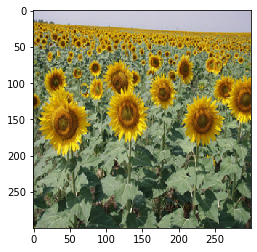

In [8]:
folder='sunflower/'
f="1022552036_67d33d5bd8_n.jpg"
img = cv2.imread(os.path.join(dir,folder,f))
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(RGB_img.shape)
print(type(RGB_img))
size=300,300
im = cv2.resize(RGB_img,size)
print(im.shape)
plt.imshow(im)
#plt.imshow(img)


In [9]:
size=(32,32)
labels = []
images = []

for folder in folders:
    for file in os.listdir(os.path.join(dir,folder)):
        if file.endswith("jpg"):
            labels.append(str(folder))
            img = cv2.imread(os.path.join(dir,folder,file))
            RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(RGB_img,size)
            images.append(np.array(im))
        else:
            continue


In [10]:
len(images)

4323

In [11]:
len(labels)

4323

In [12]:
le=LabelEncoder()
y=le.fit_transform(labels)
y=to_categorical(y,5)

In [13]:
labels

['daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',


In [14]:
x=np.array(images)
x=x/255

In [15]:
x.shape

(4323, 32, 32, 3)

In [16]:
y.shape

(4323, 5)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,)

In [18]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from matplotlib import pyplot as plt
import seaborn as sns
from keras.layers import Dropout, Flatten,Activation

In [150]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Conv2D(filters = 96, kernel_size = (2,2),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(5, activation="softmax"))


W0905 16:10:50.951439  3408 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [151]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 8, 8, 96)          24672     
__________

In [155]:
history=model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=40,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 3242 samples, validate on 1081 samples
Epoch 1/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6747 - acc: 0.7480 - val_loss: 0.9006 - val_acc: 0.6623
Epoch 2/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6721 - acc: 0.7443 - val_loss: 0.8470 - val_acc: 0.6827
Epoch 3/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6748 - acc: 0.7332 - val_loss: 0.8241 - val_acc: 0.6892
Epoch 4/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6715 - acc: 0.7397 - val_loss: 0.8093 - val_acc: 0.6984
Epoch 5/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6878 - acc: 0.7400 - val_loss: 0.8914 - val_acc: 0.6772
Epoch 6/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6847 - acc: 0.7406 - val_loss: 0.8896 - val_acc: 0.6679
Epoch 7/40
3242/3242 [==============================] - 5s 2ms/step - loss: 0.6594 - acc: 0.7495 - val_loss: 0.8329 - val_acc: 0.6846
Epoch 8/40
324

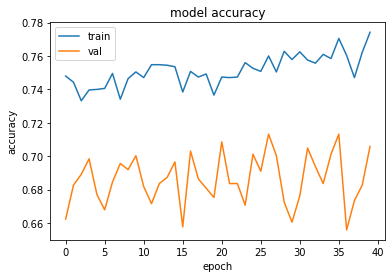

In [156]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

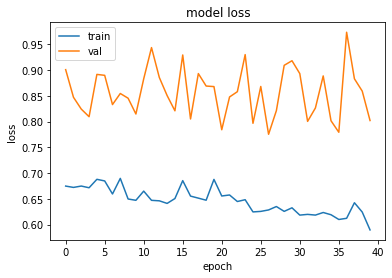

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [138]:
model_structure = model.to_json()
f = Path("mod_structure86.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("mod_weights86.h5")